# Madrid house price prediction

En este proyecto de ciencia de datos, hemos llevado a cabo un análisis detallado de un conjunto de datos de ventas de viviendas en el condado de King, con el propósito de desarrollar un modelo predictivo preciso para estimar los precios de las propiedades. A través de un exhaustivo Análisis Exploratorio de Datos (EDA), hemos obtenido una comprensión profunda de las características y relaciones clave entre las variables. Ahora, nos encontramos en una fase crucial: la construcción, evaluación y selección del modelo más adecuado para el pronóstico.

## 1. Contexto


## 2. Datos
Los datos se refieren a las viviendas de la ciudad de Madrid a lo largo de sus 21 distritosun 

### 2.1 Carga de datos

In [25]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Importing ML libraries and metrics
from math import sqrt
# from tqdm import tqdm
# import lightgbm as lgb
# import xgboost as xgb
# from lightgbm import early_stopping, log_evaluation
from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.neighbors import KNeighborsRegressor
#from xgboost import XGBRegressor
#from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import shap


In [14]:
# Ajusta las opciones de visualización
pd.set_option('display.max_rows', None)  # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [28]:
X_train= pd.read_csv('./data/X_train_scaled.csv',sep=";",index_col=False)
X_val= pd.read_csv('./data/X_val_scaled.csv',sep=";",index_col=False)
X_test= pd.read_csv('./data/X_test_scaled.csv',sep=";",index_col=False)


In [29]:
# Basic dataset information
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6316 entries, 0 to 6315
Data columns (total 68 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   m2_constr                                         6316 non-null   float64
 1   cod_barrio                                        6316 non-null   float64
 2   estado                                            6316 non-null   float64
 3   amueblado                                         6316 non-null   float64
 4   planta                                            6316 non-null   float64
 5   codigo_postal                                     6316 non-null   float64
 6   certificado_energetico                            6316 non-null   float64
 7   orientacion_este                                  6316 non-null   float64
 8   orientacion_oeste                                 6316 non-null   float64
 9   orientacion_sur    

In [17]:
# Identifying the unique number of values in the dfset
X_train.nunique()

m2_constr                                            526
cod_distrito                                          21
cod_barrio                                           131
estado                                                 6
amueblado                                              4
planta                                                27
codigo_postal                                         49
certificado_energetico                                 2
orientacion_este                                       2
orientacion_oeste                                      2
orientacion_sur                                        2
orientacion_norte                                      2
num_personas                                         131
num_personas_hombres                                 131
total_transacciones                                  122
viv_nuevas_transacciones                              58
lineas_metro                                           8
num_lineas_buses               

### 2.2 Análisis de datos

In [18]:
# Viewing the df statistics
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
m2_constr,7896.00,0.50,1.78,-1.06,-0.36,0.00,0.64,37.98
cod_distrito,7896.00,0.23,0.72,-0.62,-0.25,0.00,0.75,1.88
cod_barrio,7896.00,0.19,0.69,-0.66,-0.30,0.00,0.70,1.80
estado,7896.00,0.19,0.76,-0.50,-0.50,0.00,0.50,2.00
amueblado,7896.00,0.10,0.30,0.00,0.00,0.00,0.00,1.00
planta,7896.00,0.31,1.14,-1.50,-0.50,0.00,0.50,12.50
codigo_postal,7896.00,0.18,0.65,-0.69,-0.34,0.00,0.66,1.63
certificado_energetico,7896.00,0.18,0.39,0.00,0.00,0.00,0.00,1.00
orientacion_este,7896.00,0.06,0.24,0.00,0.00,0.00,0.00,1.00
orientacion_oeste,7896.00,0.05,0.22,0.00,0.00,0.00,0.00,1.00


C:\Users\extas\AppData\Local\Temp\ipykernel_20132\3380500756.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(X_train['target'], kde=True, palette='Set1')


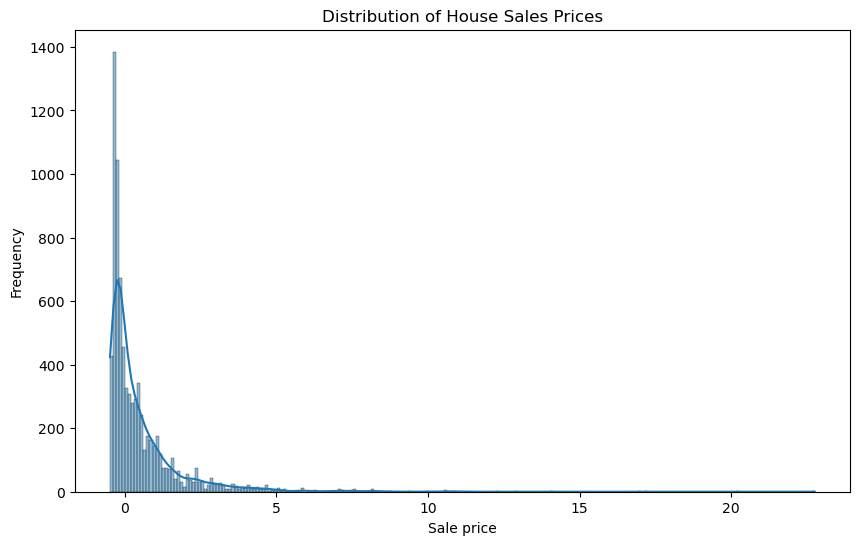

In [19]:
# View the distribution of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(X_train['target'], kde=True, palette='Set1')
plt.title('Distribution of House Sales Prices')
plt.xlabel('Sale price')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [20]:
# Finding out the correlation between the features
#quitamos url
corr =  X_train.drop(columns=['url']).corr()

corr

,m2_constr,cod_distrito,cod_barrio,estado,amueblado,planta,codigo_postal,certificado_energetico,orientacion_este,orientacion_oeste,orientacion_sur,orientacion_norte,num_personas,num_personas_hombres,total_transacciones,viv_nuevas_transacciones,lineas_metro,num_lineas_buses,renta_bruta_media_por_persona,habitantes,tamano_medio_del_hogar,tamaño_del_hogar_(nº_de_personas_en_la_vivienda),hog_con_10,hog_con_15_y_más,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,cod_barrio_group,tipologia_Atico,tipologia_Casa,tipologia_Chalet,tipologia_Duplex,tipologia_Estudio,tipologia_Piso,antiguedad_Desconocido,antiguedad_Entre 10 y 30 años,antiguedad_Entre 30 y 50 años,antiguedad_Entre 5 y 10 años,antiguedad_Menos de 5 años,antiguedad_Más de 50 años,tipo_inmueble_Desconocido,tipo_inmueble_económico,tipo_inmueble_lujo,tipo_inmueble_medio,tipo_inmueble_señorial,clasificacion_aire_Desconocido,clasificacion_aire_Eficiente,clasificacion_aire_Normal,clasificacion_aire_Sin Aire,tipo_suelo_Baldosa,tipo_suelo_Desconocido,tipo_suelo_Gres,tipo_suelo_Madera,tipo_suelo_Otros,tipo_suelo_Piedra,tipo_suelo_Radiante,grupo_cocina_Abierta,grupo_cocina_Amueblada,grupo_cocina_Desconocido,grupo_cocina_Equipada,grupo_cocina_Independiente,grupo_cocina_Isla,grupo_cocina_No amueblada,grupo_cocina_Reformada,grupo_cocina_Sin reforma,total_estaciones,habitaciones,atrib_lujo,atrib,serv_barrio,target
m2_constr,1.00,-0.08,-0.08,-0.04,0.01,-0.10,-0.07,-0.01,0.02,0.01,0.05,-0.00,-0.20,-0.04,-0.18,-0.07,0.13,-0.07,0.28,-0.09,-0.01,-0.08,-0.19,0.08,0.20,-0.08,-0.03,0.05,0.32,0.02,0.24,0.48,0.04,-0.07,-0.37,0.01,0.02,0.02,0.04,0.03,-0.04,-0.17,-0.07,0.25,-0.05,-0.01,-0.06,0.02,0.06,0.01,-0.03,0.05,-0.07,-0.01,-0.03,-0.01,0.02,-0.01,0.03,-0.04,-0.00,0.04,0.00,-0.01,-0.00,0.00,0.13,0.73,0.30,0.03,0.04,0.69
cod_distrito,-0.08,1.00,0.99,0.11,-0.16,-0.04,0.56,0.03,-0.00,0.01,-0.02,0.01,0.30,0.02,0.01,0.33,-0.69,-0.63,-0.56,0.29,0.81,-0.59,0.36,-0.19,0.14,0.04,0.05,-0.03,-0.60,-0.01,0.07,0.05,0.01,-0.03,-0.05,-0.06,0.10,0.11,-0.00,0.04,-0.05,0.11,0.12,-0.21,0.08,0.01,0.07,-0.00,-0.07,0.00,0.04,-0.08,0.09,0.03,0.04,-0.01,-0.00,-0.05,-0.01,0.01,-0.04,0.05,-0.01,0.01,0.01,0.01,0.28,-0.11,0.24,-0.01,-0.34,-0.28
cod_barrio,-0.08,0.99,1.00,0.11,-0.16,-0.04,0.56,0.03,-0.00,0.01,-0.01,0.01,0.30,0.02,0.01,0.34,-0.68,-0.62,-0.56,0.29,0.80,-0.57,0.37,-0.17,0.14,0.04,0.05,-0.03,-0.60,-0.01,0.08,0.05,0.01,-0.03,-0.05,-0.05,0.11,0.11,-0.00,0.04,-0.05,0.11,0.12,-0.21,0.08,0.01,0.07,-0.01,-0.07,-0.00,0.04,-0.08,0.09,0.03,0.03,-0.01,-0.00,-0.05,-0.01,0.01,-0.04,0.05,-0.01,0.01,0.01,0.01,0.28,-0.11,0.23,-0.01,-0.34,-0.28
estado,-0.04,0.11,0.11,1.00,0.08,0.03,0.03,-0.02,0.05,0.06,0.08,0.04,0.01,-0.00,-0.02,0.02,-0.08,-0.09,-0.03,-0.02,0.10,-0.12,-0.01,-0.06,0.05,0.06,0.13,0.23,-0.02,0.02,-0.02,-0.02,0.00,0.02,0.00,-0.01,-0.00,-0.00,0.02,0.08,-0.00,0.14,-0.09,-0.09,-0.05,-0.01,-0.20,0.04,0.20,-0.01,0.00,-0.16,0.04,0.16,-0.01,0.00,0.07,0.11,0.12,-0.10,0.11,-0.08,0.03,0.03,0.01,0.00,-0.00,-0.04,0.11,0.15,-0.04,-0.01
amueblado,0.01,-0.16,-0.16,0.08,1.00,0.01,-0.16,0.07,0.03,0.03,0.05,0.01,-0.09,-0.03,0.00,-0.06,0.11,0.12,0.10,-0.10,-0.18,0.10,-0.10,0.00,-0.05,-0.06,0.12,0.17,0.13,-0.02,-0.03,-0.02,-0.02,0.01,0.03,-0.19,0.04,0.04,0.00,0.02,0.17,-0.03,-0.04,0.06,-0.02,0.01,-0.22,0.01,0.22,-0.01,-0.02,-0.09,-0.02,0.11,-0.02,-0.01,0.03,0.10,0.16,-0.18,0.17,-0.01,0.05,-0.00,-0.01,-0.01,-0.11,0.02,-0.01,0.32,0.11,0.09
planta,-0.10,-0.04,-0.04,0.03,0.01,1.00,-0.09,0.00,-0.00,0.01,0.03,0.02,-0.02,-0.00,-0.01,-0.02,0.08,-0.01,0.10,-0.07,-0.05,-0.03,-0.11,-0.07,-0.04,0.00,-0.04,-0.01,0.08,0.44,-0.20,-0.20,-0.02,-0.03,-0.05,0.03,-0.04,0.03,0.00,-0.01,-0.02,0.05,-0.05,-0.02,-0.02,-0.01,-0.04,-0.02,0.04,-0.01,-0.01,0.00,-0.04,0.03,-0.02,0.00,-0.02,-0.03,-0.01,0.03,0.00,-0.03,0.01,-0.00,0.01,0.03,-0.08,-0.08,0.02,0.04,0.06,0.02
codigo_postal,-0.07,0.56,0.56,0.03,-0.16,-0.09,1.00,0.02,0.02,0.03,0.03,0.02,0.22,0.12,-0.02,0.32,-0.59,-0.26,-0.53,0.42,0.56,-0.24,0.40,-0.06,0.14,0.02,0.05,-0.06,-0.50,-0.03,0.10,0.

<Axes: >

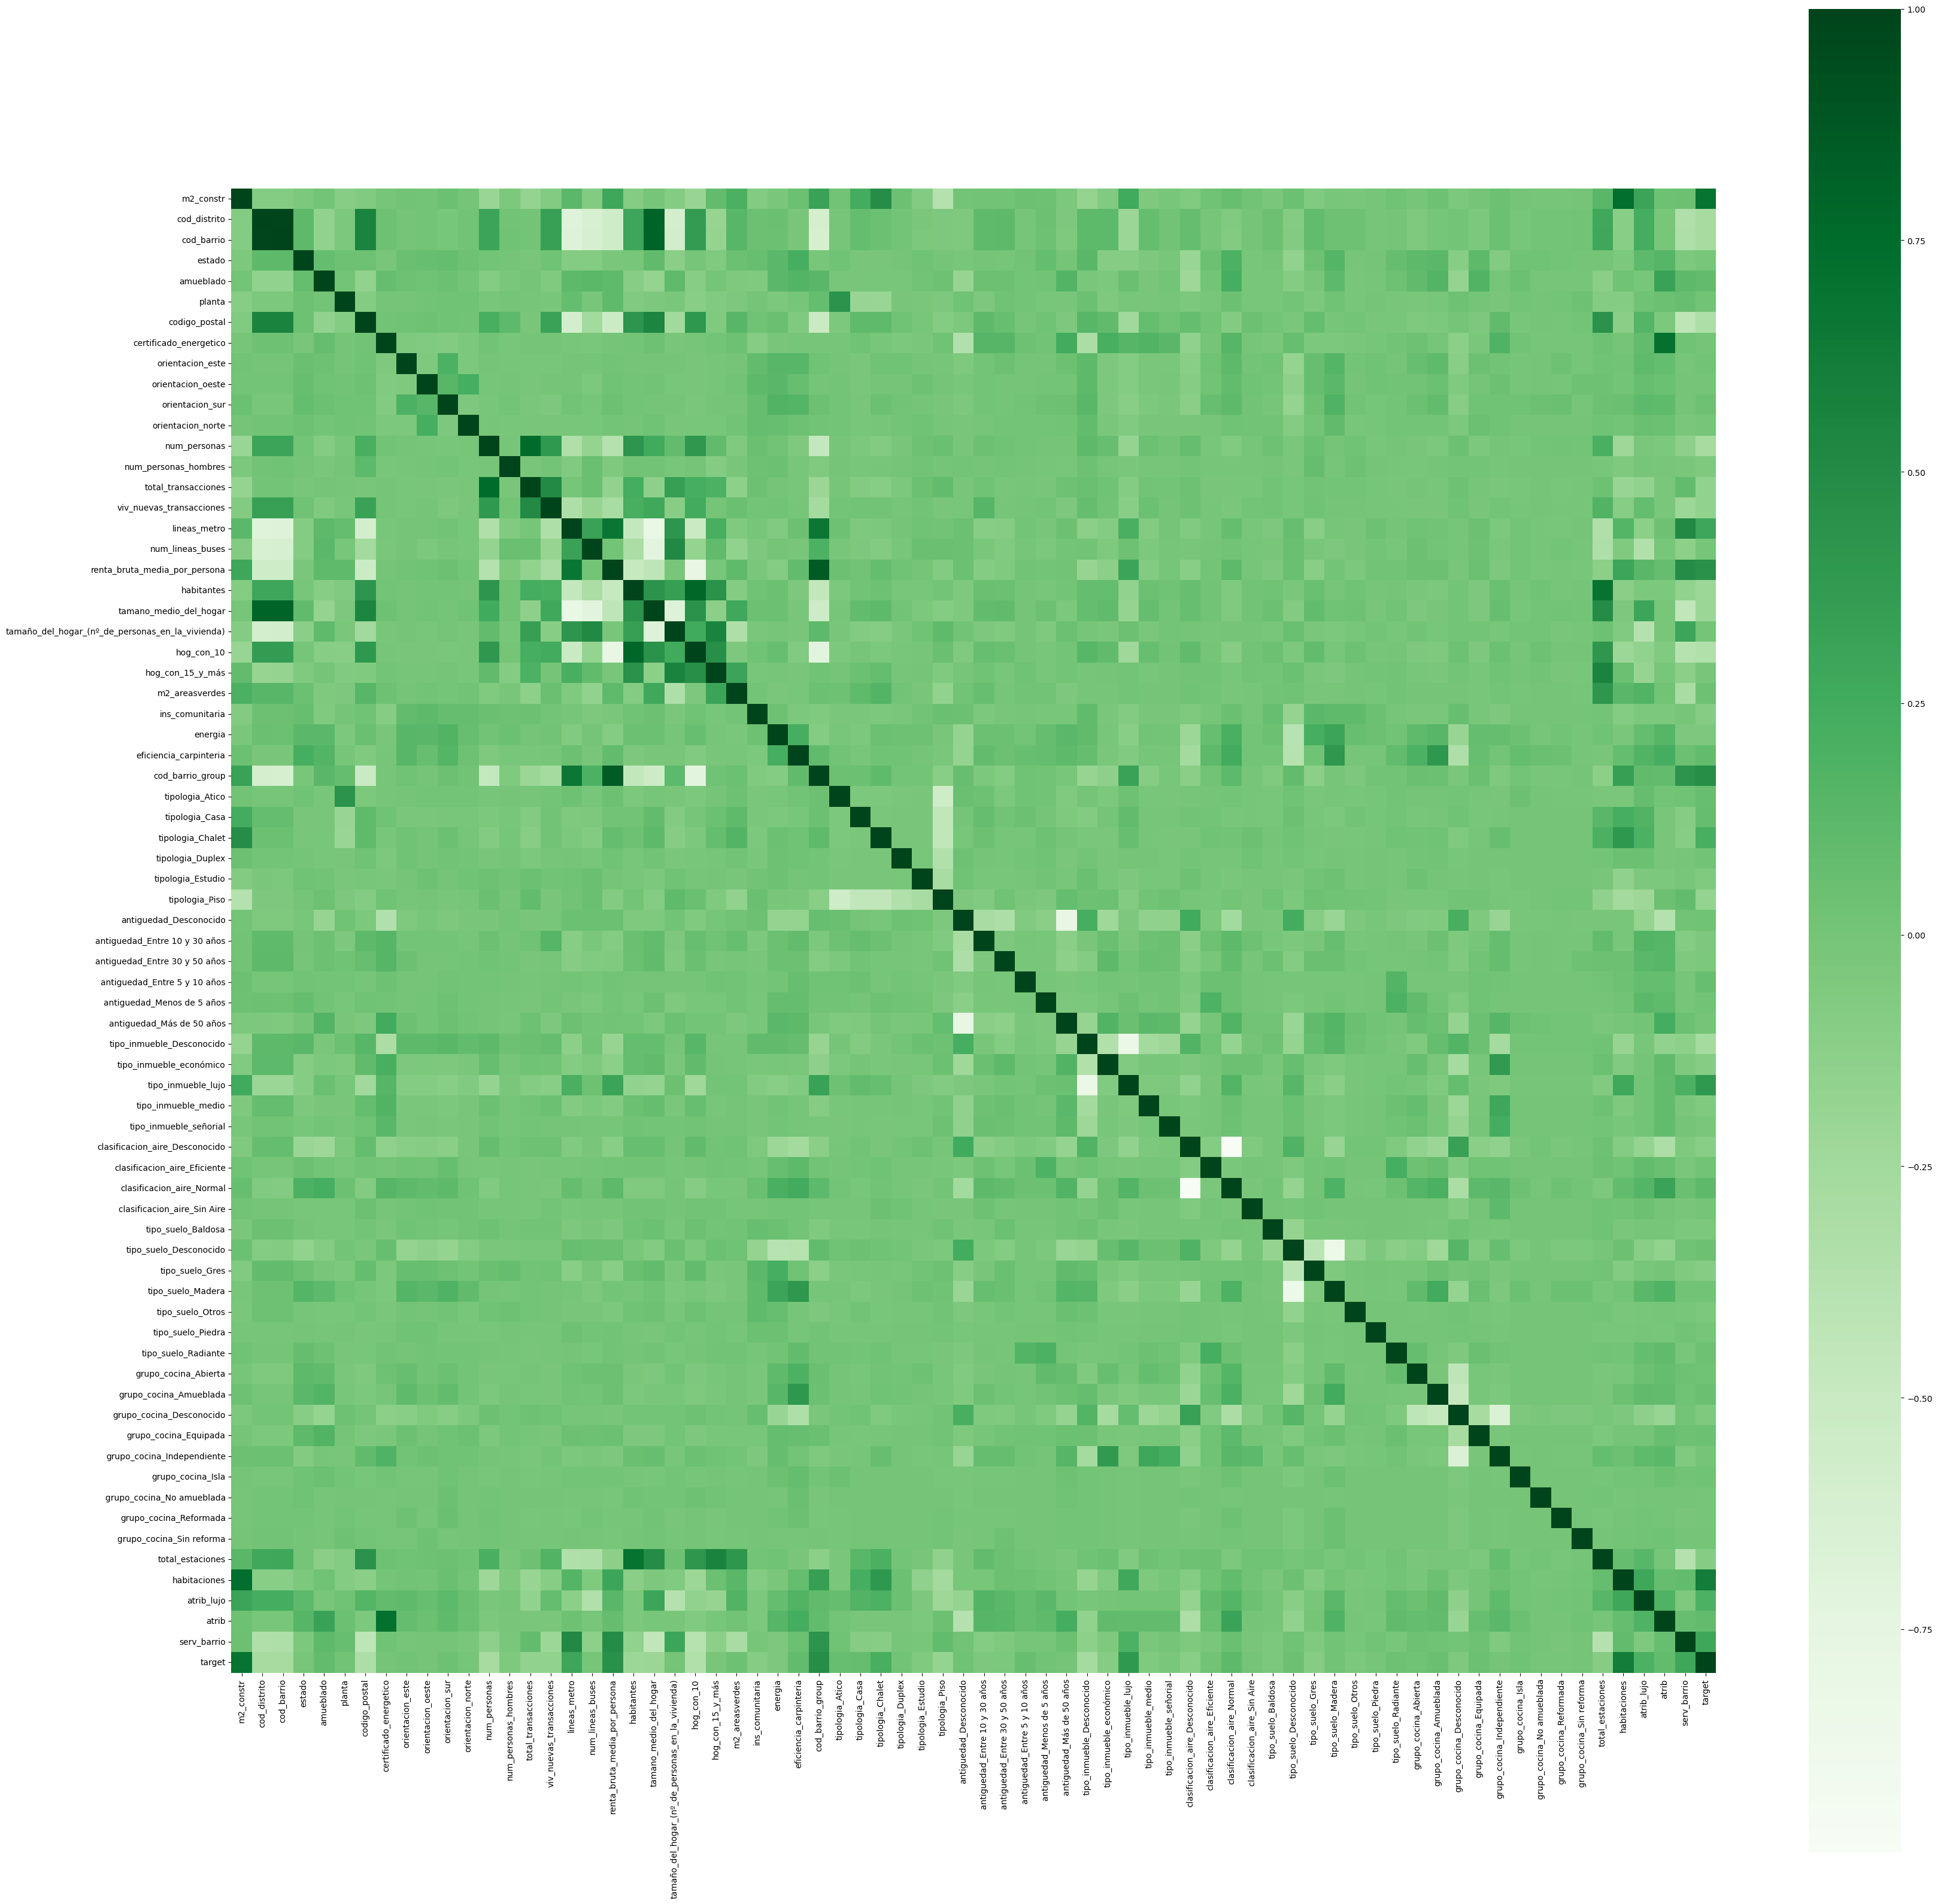

In [21]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(40,40))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=False, annot_kws={'size':15}, cmap='Greens')

In [22]:
corr[['target']].sort_values(by = 'target',ascending = False).style.background_gradient()

,target
target,1.000000
m2_constr,0.691266
habitaciones,0.618618
cod_barrio_group,0.477916
renta_bruta_media_por_persona,0.453213
tipo_inmueble_lujo,0.391906
lineas_metro,0.290321
serv_barrio,0.279378
tipologia_Chalet,0.219391
atrib_lujo,0.198836


In [24]:
corr_precio = corr.loc['target']
columnas_seleccionadas = corr_precio[(corr_precio > 0.19) | (corr_precio < -0.19)].index

print(columnas_seleccionadas)

Index(['m2_constr', 'cod_distrito', 'cod_barrio', 'codigo_postal',
       'num_personas', 'lineas_metro', 'renta_bruta_media_por_persona',
       'habitantes', 'tamano_medio_del_hogar', 'hog_con_10',
       'cod_barrio_group', 'tipologia_Chalet', 'tipo_inmueble_Desconocido',
       'tipo_inmueble_lujo', 'habitaciones', 'atrib_lujo', 'serv_barrio',
       'target'],
      dtype='object')


### 2.3 Extracción de la variable target en train / test

In [11]:
X_train['target'].head()

0   -0.31
1    0.34
2    0.57
3    2.25
4   -0.19
Name: target, dtype: float64

In [12]:
df_ids = X_train[['url']]
y_train=X_train['target']
y_test=X_test['target']
X_train = X_train.drop(columns=["url","target"])
X_test = X_test.drop(columns=["url","target"])


In [13]:
# Ajustar las configuraciones de pandas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.expand_frame_repr', False)  # Evitar el ajuste a nuevas líneas

#### Entrenamiento

In [ ]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

In [ ]:
# Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns, lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

### 3.2 Evaluación sobre train

In [ ]:
# Model prediction on train df
y_pred = lm.predict(X_train)

# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Vamos a entrenar varios modelos de Regresión con los hiperparametros por defecto para ver cual de ellos se adapta mejor a nuestros datos.

In [ ]:

# Se seleccionan los siguientes modelos de Regresión

# Template list
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "KNN Regressor": KNeighborsRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),  
    "LGBM Regressor": lgb.LGBMRegressor()
}

# Diccionario para almacenar métricas
metrics = {}

# Diccionario para guardar la importancia de características
feature_importance_dict = {}

# Entrenamos y evaluamos los  modelos
for nome, modelo in models.items():
    
    # Entrenar el modelo
    modelo.fit(X_train, y_train)
    
    # Predecir en test
    y_pred = modelo.predict(X_test)

    # Calcular métricas
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Guardar métricas
    metrics[nome] = {"R2": r2, "MAE": mae, "RMSE": rmse}
    
    # Comprobar si el modelo tiene feature_importances_
    if hasattr(modelo, 'feature_importances_'):
        importancias = modelo.feature_importances_
        nomes_features = np.array(X_train.columns)

        # Ordenar las características por importancia
        indices = np.argsort(importancias)
        importancias = importancias[indices]
        nomes_features = nomes_features[indices]

        # Guardar importancia de características en el diccionario
        feature_importance_dict[nome] = (nomes_features, importancias)

# Convertir métricas en un DataFrame y ordenar por R² descendente
df_metrics = pd.DataFrame(metrics).T.sort_values(by="R2", ascending=False)

# Mostrar las métricas
print(df_metrics)

# Seleccionar los 3 mejores modelos según R²
top_3_models = df_metrics.index[:3]

# Graficar la importancia de características de los 3 mejores modelos
for model_name in top_3_models:
    if model_name in feature_importance_dict:  # Verificar si tiene feature_importances_
        nomes_features, importancias = feature_importance_dict[model_name]
        
        # Seleccionar las 10 características más importantes
        num_features = min(10, len(nomes_features))
        importancias_top = importancias[-num_features:]
        nomes_features_top = nomes_features[-num_features:]

        # Graficar
        plt.figure(figsize=(10, 6))
        plt.barh(range(num_features), importancias_top, align='center')
        plt.yticks(range(num_features), nomes_features_top)
        plt.xlabel('Importancia de las Features')
        plt.ylabel('Features')
        plt.title(f'Importancia de Features - {model_name}')
        plt.grid(False)
        plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1253
[LightGBM] [Info] Number of data points in the train set: 7896, number of used features: 63
[LightGBM] [Info] Start training from score 0.482926
                  R2_Test  MAE RMSE
LGBM Regressor       0.81 0.25 0.63
Random Forest        0.78 0.23 0.68
XGBoost              0.75 0.27 0.71
Gradient Boosting    0.74 0.27 0.74

Mejores hiperparámetros por modelo:
Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}
Gradient Boosting: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}
XGBoost: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}
LGBM Regressor: {'num_leaves': 20, 'n_estimators': 100, 'max_depth': 30, 'learning_rate': 0.1

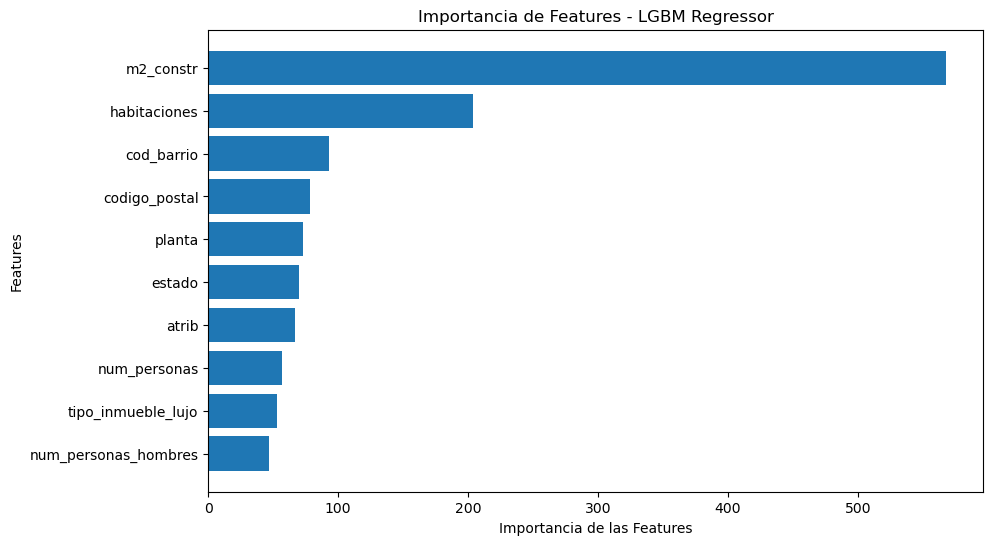

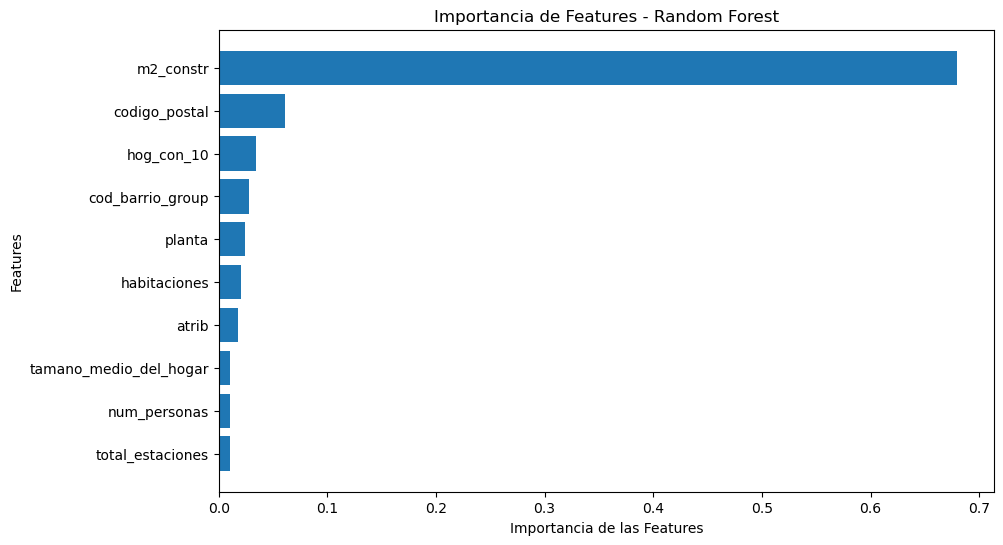

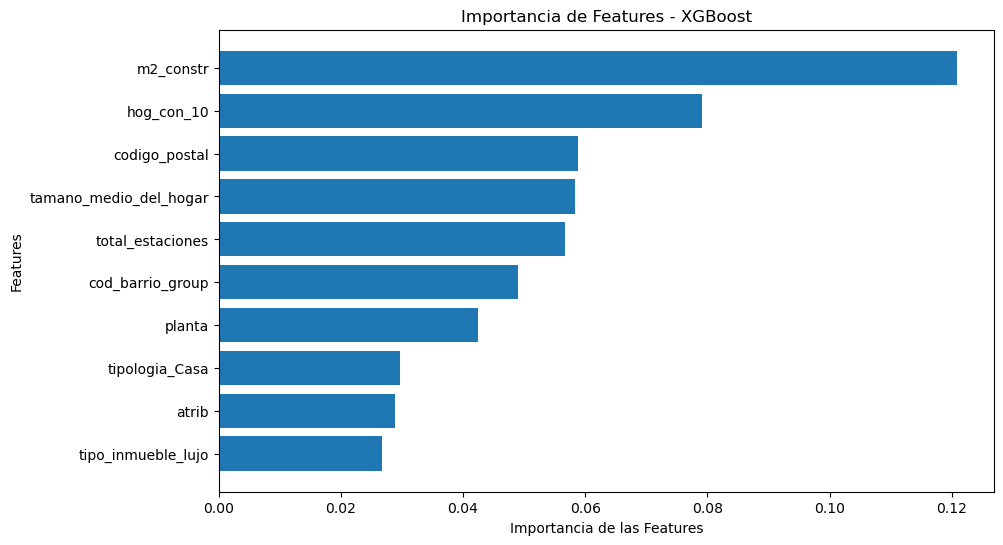

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, KFold
# Template list
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "KNN Regressor": KNeighborsRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),    
    "LGBM Regressor": lgb.LGBMRegressor()
}
# Modelos y sus hiperparámetros
models_params = {
    "Random Forest": {
        "model": RandomForestRegressor(),
        "params": {
            "n_estimators": [50, 100, 200, 300],
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(),
        "params": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.05, 0.1, 0.2],
            "max_depth": [3, 4, 5, 6]
        }
    },
    "XGBoost": {
        "model": XGBRegressor(),
        "params": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.05, 0.1, 0.2],
            "max_depth": [3, 4, 5, 6],
            "subsample": [0.7, 0.8, 0.9, 1.0]
        }
    },
          
    "LGBM Regressor": {
        "model": lgb.LGBMRegressor(),
        "params": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.05, 0.1, 0.2],
            "num_leaves": [20, 31, 40, 50],
            "max_depth": [-1, 10, 20, 30]
        }
    }
}

# Configurar validación cruzada con 5 folds
#kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Diccionario para almacenar métricas
metrics = {}

# Diccionario para guardar la importancia de características
feature_importance_dict = {}

# Loop para entrenar y evaluar modelos
for nome, info in models_params.items():
    modelo = info["model"]
    param_dist = info["params"]
    
    # RandomizedSearchCV para búsqueda de hiperparámetros
    random_search = RandomizedSearchCV(modelo, param_dist, cv=4, n_iter=10, scoring="r2", random_state=42, n_jobs=-1)
    random_search.fit(X_train, y_train)
    
    # Mejor modelo encontrado
    best_model = random_search.best_estimator_

    # Predecir en test
    y_pred = best_model.predict(X_test)

    # Calcular métricas
    r2_test = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Guardar métricas
    metrics[nome] = {
        "R2_Test": r2_test,  
        "MAE": mae,
        "RMSE": rmse,
        "Best_Params": random_search.best_params_
    }
    
    # Comprobar si el modelo tiene feature_importances_
    if hasattr(best_model, 'feature_importances_'):
        importancias = best_model.feature_importances_
        nomes_features = np.array(X_train.columns)

        # Ordenar características por importancia
        indices = np.argsort(importancias)
        importancias = importancias[indices]
        nomes_features = nomes_features[indices]

        # Guardar importancia de características en el diccionario
        feature_importance_dict[nome] = (nomes_features, importancias)

# Convertir métricas en un DataFrame y ordenar por R²
df_metrics = pd.DataFrame(metrics).T.sort_values(by="R2_Test", ascending=False)

# Mostrar métricas y mejores hiperparámetros
print(df_metrics[["R2_Test", "MAE", "RMSE"]])
print("\nMejores hiperparámetros por modelo:")
for modelo, valores in metrics.items():
    print(f"{modelo}: {valores['Best_Params']}")

# Seleccionar los 3 mejores modelos según R² en test
top_3_models = df_metrics.index[:3]

# Graficar la importancia de características de los 3 mejores modelos
for model_name in top_3_models:
    if model_name in feature_importance_dict:  # Verificar si tiene feature_importances_
        nomes_features, importancias = feature_importance_dict[model_name]
        
        # Seleccionar las 10 características más importantes
        num_features = min(10, len(nomes_features))
        importancias_top = importancias[-num_features:]
        nomes_features_top = nomes_features[-num_features:]

        # Graficar
        plt.figure(figsize=(10, 6))
        plt.barh(range(num_features), importancias_top, align='center')
        plt.yticks(range(num_features), nomes_features_top)
        plt.xlabel('Importancia de las Features')
        plt.ylabel('Features')
        plt.title(f'Importancia de Features - {model_name}')
        plt.grid(False)
        plt.show()


In [21]:
explainer = shap.TreeExplainer(best_model) # Instanciamos explicador
shap_values = explainer(X_train) # Se obtienen las explicaciones (SHAP values)
y_pred_raw = best_model.predict(
    X_train,    
)


# Comprobamos que los SHAP values suman las predicciones marginales
np.abs(shap_values.values.sum(axis = 1) + shap_values.base_values - y_pred_raw).max()

2.220446049250313e-14

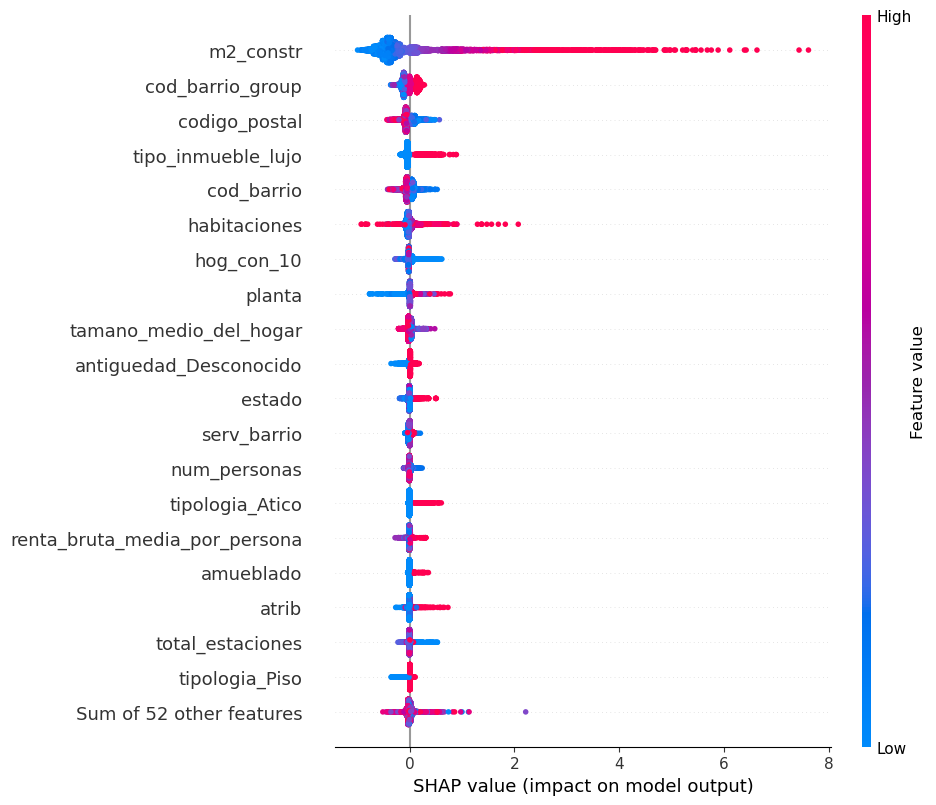

In [22]:
# Gráfico de importancia por variable para cada una de las observaciones
shap.plots.beeswarm(shap_values, max_display = 20)

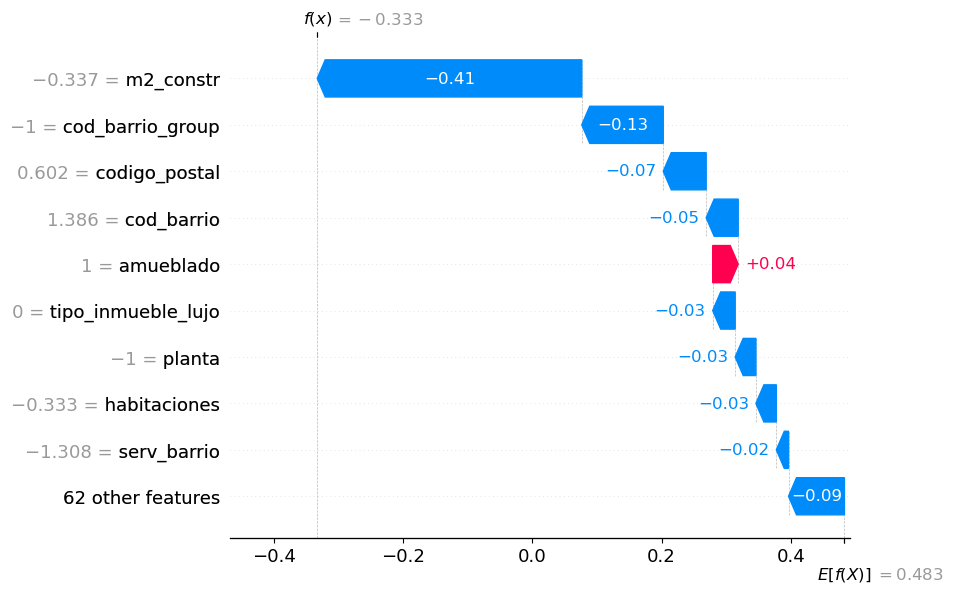

In [23]:
# Gráfico para ver cómo se pasa del explainer.expected_value al model.predict(X)[ind_obs]
ind_obs = 100
shap.plots.waterfall(shap_values[ind_obs])

Vamos a entrenar y evaluar varios modelos de regresión utilizando los hiperparámetros predeterminados, calcular sus métricas de rendimiento, y graficar la importancia de las características para los modelos que la soportan. 

Aplicamos ocho modelos de aprendizaje automático para la tarea de regresión.
Los modelos incluidos son: Regresión Lineal, Árbol de Decisión, Bosque Aleatorio, Regresor KNN, Gradient Boosting, XGBoost, AdaBoost y LightGBM Regressor. 
Cada modelo se entrena y evalua utilizando técnicas de validación cruzada para garantizar una evaluación sólida de su rendimiento.
Se consideran diversas métricas para evaluar la calidad de las predicciones de cada modelo, incluyendo el coeficiente de determinación (R²), el error cuadrático medio (RMSE), entre otros.


Los resultados indican que el modelo con mejor desempeño es xxxxxxx, logrando un R² de xxxxx%.
A continuación, el xxxxxxx obtuvo un R² del xxxxx%.
Estos resultados reflejan la capacidad de estos modelos para capturar y predecir patrones en los datos de manera efectiva.

8. Features importantes

Analizamos las variables o atributos que tienen un impacto significativo en la predicción o explicación de un resultado específico en un modelo estadístico o de aprendizaje automático. Estas características se seleccionan en función de su capacidad para influir en la variable objetivo y aportar información útil al modelo. 
